<a href="https://colab.research.google.com/github/gudiseva/IIT_Madras_Shaastra/blob/main/Overview_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Networks: (Non-linear Model)
**Why is there a need for another type of model?** 

Let us say we have a very large classification problem where the number of features are very high. Not all supervised learning problems can be solved using linear models. Using the regression models we learnt or a typical polynomial fit or a logistical function would be computationally expensive and tedious. For example, if we were to classify the data in the scatter plot below, it is quite difficult to find any linear or polynomial decision boundary. The main aim of the new model is to include some sort of non-linearity in the model. 

We would look at an particular algorithm called Neural Networks, which is basically an algorithm that tries to mimic the brain.

Neural nets are the state-of-the-art technique for many large ML problems, and are also widely used in CVI. 

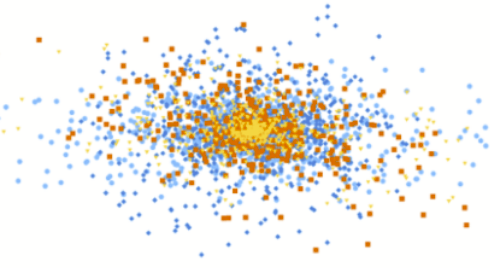

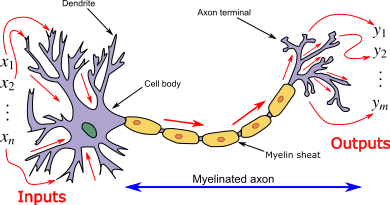

A  biological neuron takes in inputs through the dendrites, processes it and passes out the output through the axons to various other neurons. This system of connections of neurons, forms the human nervous system, and is a **Biological Neural Network**.

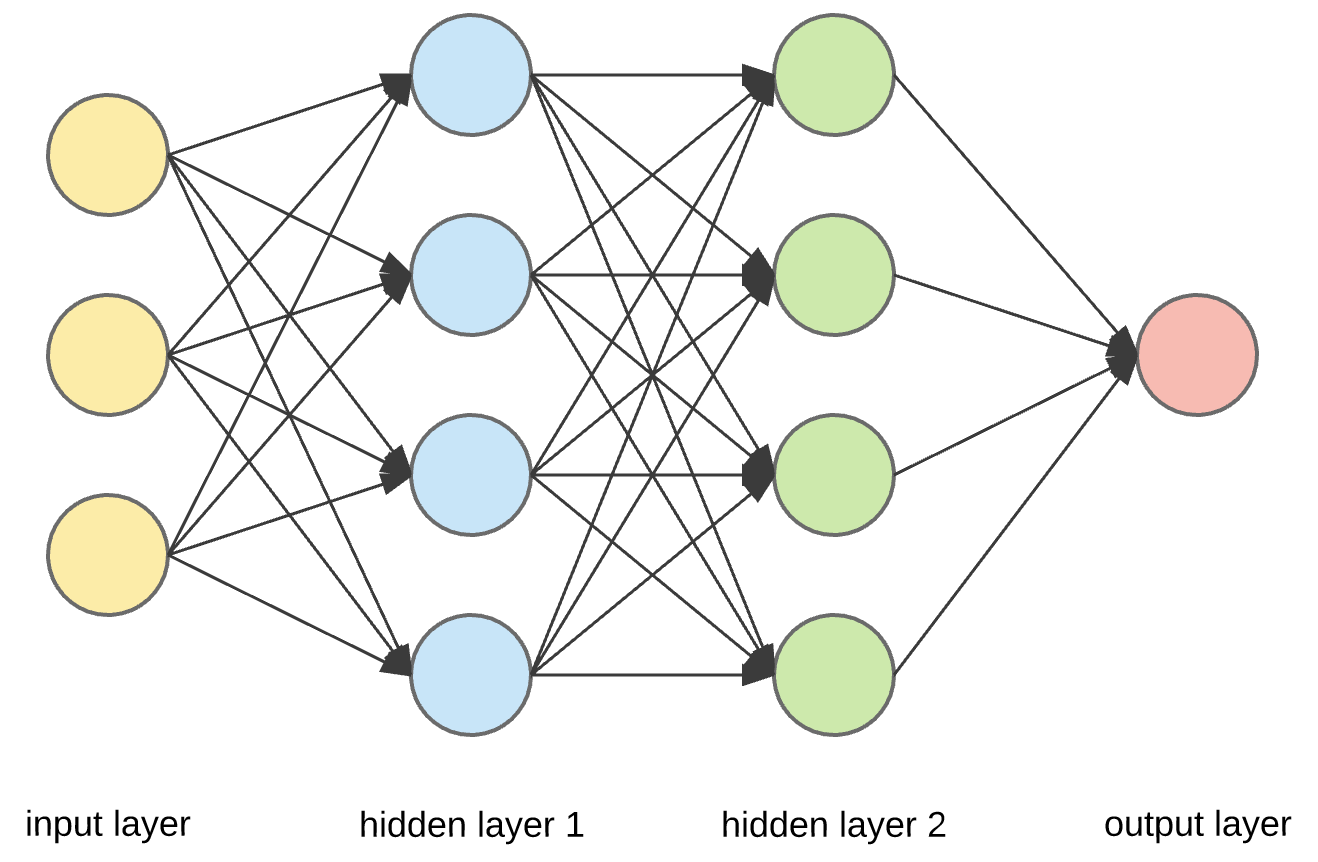

Shown in the above image is a *feed forward neural network*, there are other types of neural networks too like *Recurrent Neural Nets* (RNN), *Convolution Neural Nets* (CNNs). 

 **Artificial Neural Network**:
 A neural network’s architecture is derived from the structure of a human brain while from a mathematical point of view, it can be understood as a function which maps a set of inputs to desired outputs. 

A neural network comprises of the following components:

   1. **Input Layer (X)**: This layer contains the values corresponding to the features in our dataset.

   2. **A set of weights and biases (W₁,W₂,..etc); (b₁,b₂,..etc)**: These weights and biases are represented in the form matrices and they decide the importance of each feature/column in our dataset.
   3. **Hidden Layer**: This layer acts as a brain of the neural network and also as an interface between the input and the output layer. There can be one or more than one hidden layers in a neural network.
   4. **Output Layer**: The values transmitted from the input layer will reach this layer via the hidden layer(s).
   5. **A set of activation functions**: This is the component which adds a non-linearity flavour to an otherwise linear model. These functions are applied to the output of each layer except the input layer and activate/transform them.

Let us say the activation function is given ${g(x)}$. Let z be a term given by adding the bias to the *dot/inner products* of the two vectors, which are weights and inputs of the respective layer here. It is also called the weighted input of the neurons. So, ${z} = {wx} + {b}$, where ${w}$ and ${x}$ are the weights and inputs respectively, and ${b}$ is the bias. So, now the output for the given input is given by using the activation function, 
${y}= {g(wx + b)}$ 

We can use various **activation functions** as follows:

a. **Sigmoid Function**: This is a very commonly used activation function, also called the 'logistic function' since it is used in Logistic Regression too. 
It can take any input and squish it to an output between 0 and 1 using an S-shaped sigmoid curve as shown. 

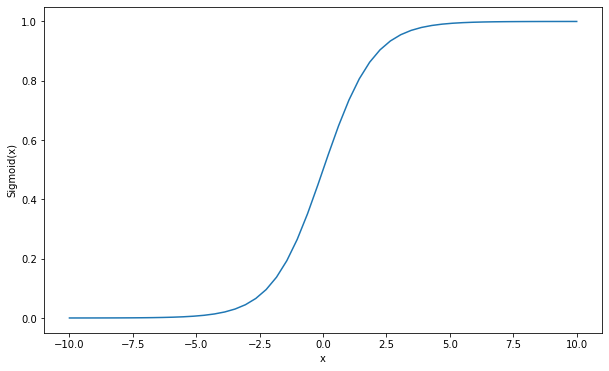

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
def sig(x):
 return 1/(1 + np.exp(-x))
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

b. **ReLU (Rectified Linear Unit) Activation Function**: The ReLU activation function maps the input to a value between 0 and infinity, based on the equation ${max(0,z)}$ where the concept is to:

In [ ]:
#Return 0 if the input is negative otherwise return the input as it is

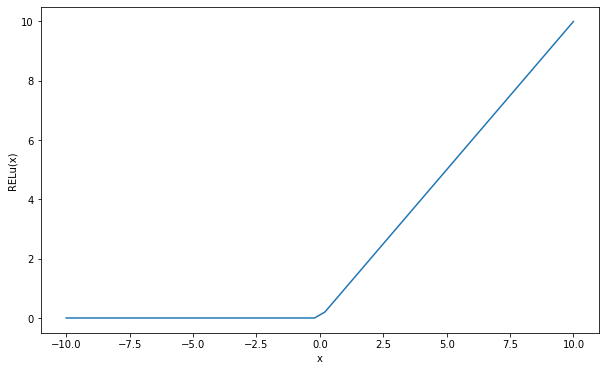

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
def relu(x):
  return np.maximum(0.0, x)
x = np.linspace(-10, 10, 50)   
p = relu(x)
plt.xlabel("x") 
plt.ylabel("RELu(x)")  
plt.plot(x, p) 
plt.show()

6. **The Loss function (cost function)**: This function calculates the measure as to how well our guess/prediction is, and it is used while back propagating through the network.

7. **Optimiser** : This optimiser is a function that updates the model parameters according to gradients which are calculated during back propagation.

##Representing the weights and inputs in matrix:
The inputs and the weights are represented in matrix notation. The bias term is incorporated into this to form a single matrix, by associating the term of ${W_0}$ with ${b}$, and letting ${X_0}$ to be 1. This way the matrix multiplication, would aptly represent the value of ${z}$.

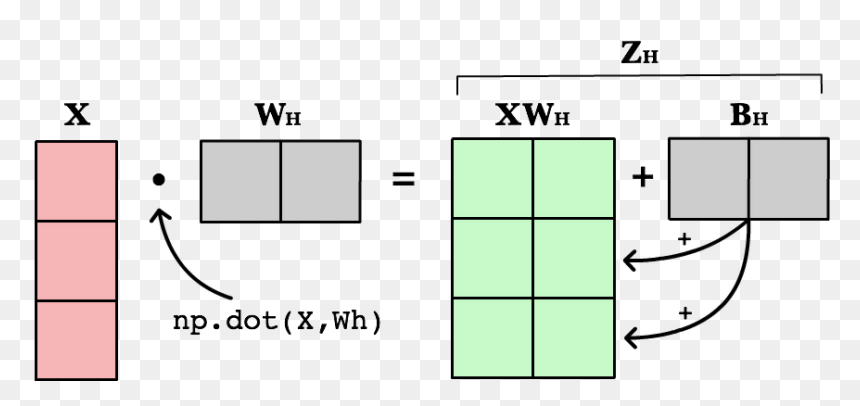

Applying the activation function, we get ${y} = {g({W^T}{X} + {b})}$. 

##How does a Neural Network Learn:

We use the Backpropagation and Gradient Descent algorithms in the training process of an Artifical Neural Network. The weights of each neuron are initialised to some random values, and then during training, these weights are updated using gradient descent so as to minimise the cost function.

**But...How do we calculate the gradient of this cost function?**

Because of the large number of weights involved in Artificial Neural Networks, the training process of these take a considerable amount of time.

 There is another process involved here, due to the nature of the an Artificial Neural Networks, which is called Backpropagation.

 For adjusting the weights, we need to find the partial derivative of the Cost Function, the weights to be updated. However, if we would want to find the partial derivatives w.r.t. any of the parameters (weights) of the previous layer, we would have to follow the chain rule, and keep taking the partial derivatives starting from the output layer, all the way upto the required hidden layer.
 
  So, instead of feeding the weights to each input, with a bias and moving forward, we're starting from the output layer and then moving all the way to the hidden layers. Hence, this approach is known as **Backpropagation**. Backpropagation is the heart of how a neural network learns. This way we can then adjust the weights and biases, and improve the performance of the neural network model.



##How the Backpropagation algorithm works:

Let's begin with a notation which lets us refer to weights in the network in an unambiguous way. We'll use $w^l_{jk}$  to denote the weight for the connection from the $k^{\rm th}$ neuron in the $(l-1)^{\rm th}$ layer to the $j^{\rm th}$ 
neuron in the $l^{\rm th}$ layer.  So, for example, the diagram below shows the weight on a connection from the fourth neuron in the second layer to the second neuron in the third layer of a network:
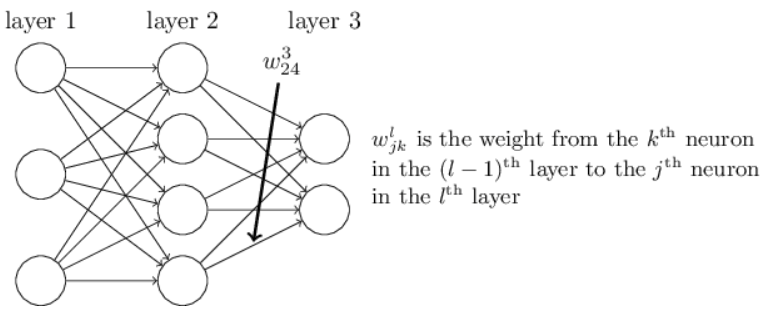

We use a similar notation for the network's biases and activations. 

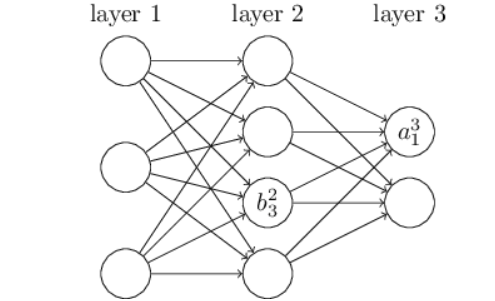

With these notations, the activation $a^{l}_j$ of the $j^{\rm th}$ neuron in the $l^{\rm th}$ layer is related to the activations in the $(l-1)^{\rm th}$ by the equation:

\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right),
\tag{23}\end{eqnarray}

where the sum is over all neurons $k$ in the $(l-1)^{\rm th}$. To write this expression in matrix form, we can use the weight matrix defined in the previous sections.  Similarly, for each layer l we define a bias vector, the components of the bias vector are just the values $b^l_j$ , one component for each neuron in the $l^{\rm th}$ layer. And finally, we define an activation vector $a^l$ whose components are the activations . 

With these notations in mind, we can write a vectorized form as
 \begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l).
\tag{25}\end{eqnarray}

The cost function has the form:
\begin{eqnarray}
  C = \frac{1}{2n} \sum_x \|y(x)-a^L(x)\|^2,
\tag{26}\end{eqnarray}
(notations have their usual meaning)

Backpropagation is about understanding how changing the weights and biases in a network changes the cost function. Ultimately, this means computing the partial derivatives $\partial C / \partial w^l_{jk}$ and $\partial C / \partial b^l_j$
Backpropagation will give us a procedure to compute the error $\delta^l_j$ and then will relate the error to $\partial C
/ \partial w^l_{jk}$ and $\partial C / \partial b^l_j$

We define the error of a neuron $j$ in the $l^{\rm th}$ as 
\begin{eqnarray} 
  \delta^l_j \equiv \frac{\partial C}{\partial z^l_j}.
\tag{29}\end{eqnarray}

Using Chain Rule, this can be written as: 
\begin{eqnarray} 
  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j).
\tag{BP1}\end{eqnarray}

Since, we want the matrix based equation for backpropagation, the matrix-based form is:
\begin{eqnarray} 
  \delta^L = \nabla_a C \odot \sigma'(z^L).
\tag{BP1a}\end{eqnarray}

The gradient of the cost function is a vector whose components are defined to be the partial derivatives of cost function with respect to the output activations. Hence, the final required equation for calculating error is :
\begin{eqnarray} 
  \delta^L = (a^L-y) \odot \sigma'(z^L).
\tag{30}\end{eqnarray} 

Everything in this expression has a nice vector form, and is easily computed using a library such as Numpy.

An equation for the error, in terms of the next layer error, can be derived as: 
\begin{eqnarray} 
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l),
\tag{BP2}\end{eqnarray}

Finding the rate of the change of the cost with respect to any bias in the network, gives us:
 \begin{eqnarray}  \frac{\partial C}{\partial b^l_j} =
  \delta^l_j.
\tag{BP3}\end{eqnarray}

Finally, finding the rate of change of cost function with respect to any weight in the network, we can use chain rule for this computation as shown:
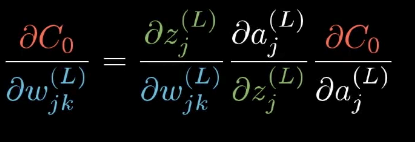

And the equation we get on simplification is:

\begin{eqnarray}
  \frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j.
\tag{BP4}\end{eqnarray}




The backpropagation equations provide us with a way of computing the gradient of the cost function. Let's explicitly write this out in the form of an algorithm:

1. **Input ${x}$** : Set the corresponding activation ${a_1}$ for the input layer.

2. **Feedforward**: For each ${l=2,3,…,L}$ compute $z^{l} = w^l a^{l-1}+b^l$,
and ${a^l} = \sigma(z^{l})$. 

3. **Output error** $\delta^L$: Compute the vector $\delta^{L}
  = \nabla_a C \odot \sigma'(z^L)$.

4. **Backpropagate the error**: For each ${l=L−1,L−2,…,2}$ compute $\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$

5. **Output**: The gradient of the cost function is given by $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$ and $\frac{\partial C}{\partial b^l_j} = \delta^l_j$. 